In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [4]:
model.compile(optimizer = 'SGD',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [5]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir = "logs/fit",histogram_freq = 1)

In [6]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10,callbacks = tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.6297 - accuracy: 0.8379 - val_loss: 0.3378 - val_accuracy: 0.9081
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3393 - accuracy: 0.9042 - val_loss: 0.2767 - val_accuracy: 0.9237
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2863 - accuracy: 0.9197 - val_loss: 0.2443 - val_accuracy: 0.9331
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2543 - accuracy: 0.9289 - val_loss: 0.2172 - val_accuracy: 0.9397
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2285 - accuracy: 0.9358 - val_loss: 0.2011 - val_accuracy: 0.9436
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2094 - accuracy: 0.9409 - val_loss: 0.1831 - val_accuracy: 0.9491
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1928 - accuracy: 0.9463 - val_loss: 0.1709 - val_ac

In [7]:
load_ext tensorboard

In [8]:
tensorboard --logdir logs/fit

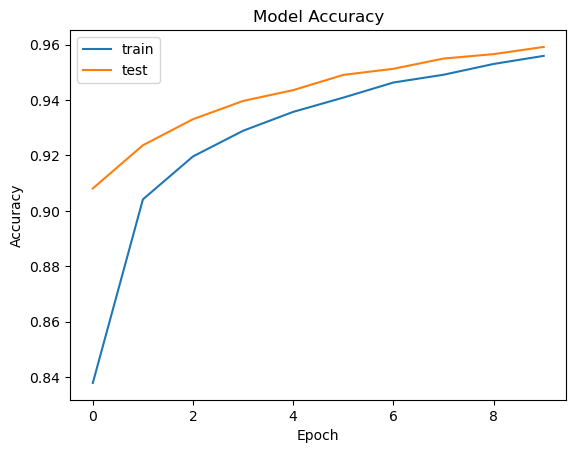

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

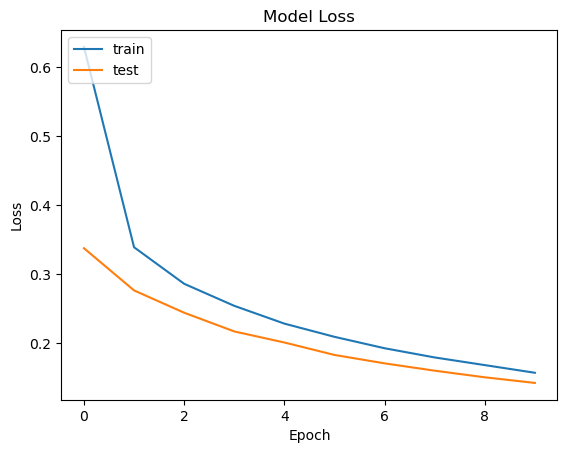

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()